<a href="https://colab.research.google.com/github/Riphah-ML-Project/Language_Detection/blob/main/Language_Detection_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing external Libraries***

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import string

***Loading dataset***

In [4]:
df = pd.read_csv('/content/Language Detection.csv')

In [5]:
df.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [6]:
df.shape

(10337, 2)

In [7]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [8]:
df['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [9]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def remove_punc(text):
  for punc in string.punctuation:
    text = text.replace(punc ,"")
    text = text.replace('"', '')
    text = text.lower()
    return(text)

In [11]:
df['Text'].apply(remove_punc)

0         nature, in the broadest sense, is the natural...
1        nature can refer to the phenomena of the physi...
2        the study of nature is a large, if not the onl...
3        although humans are part of nature, human acti...
4        [1] the word nature is borrowed from the old f...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Text, Length: 10337, dtype: object

In [12]:
remove_punc('"Nature" can refer to t!h"e p"henomena: of''[] t1~he phy...	')

'nature can refer to the phenomena: of[] t1~he phy...\t'

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.iloc[:,0]
Y = df.iloc[:,1]

In [15]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [16]:
X_train.shape

(8269,)

In [17]:
X_test.shape

(2068,)

In [18]:
from sklearn import feature_extraction

***Converting Text Sentences into numerical Sentences***

**Using TfidfVectorizer instead of countVectorizer**

In [19]:
vec  = feature_extraction.text.TfidfVectorizer(ngram_range=(1,2), analyzer='char')

In [20]:
from sklearn import pipeline
from sklearn import linear_model

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
model_pipe_gradient_boosting = pipeline.Pipeline([('vec', vec), ('clf', GradientBoostingClassifier())])


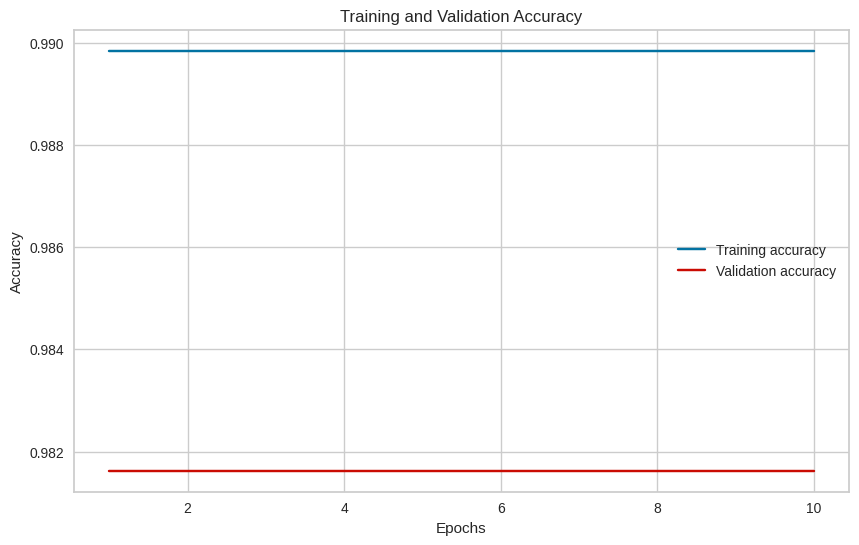

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
train_acc = []
val_acc = []
for i in range(10):  # You might need to adjust the number of epochs
    model_pipe.fit(X_train, Y_train)
    train_pred = model_pipe.predict(X_train)
    val_pred = model_pipe.predict(X_test)
    train_acc.append(metrics.accuracy_score(Y_train, train_pred))
    val_acc.append(metrics.accuracy_score(Y_test, val_pred))

# Plotting the accuracy
plt.figure(figsize=(10, 6))

epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

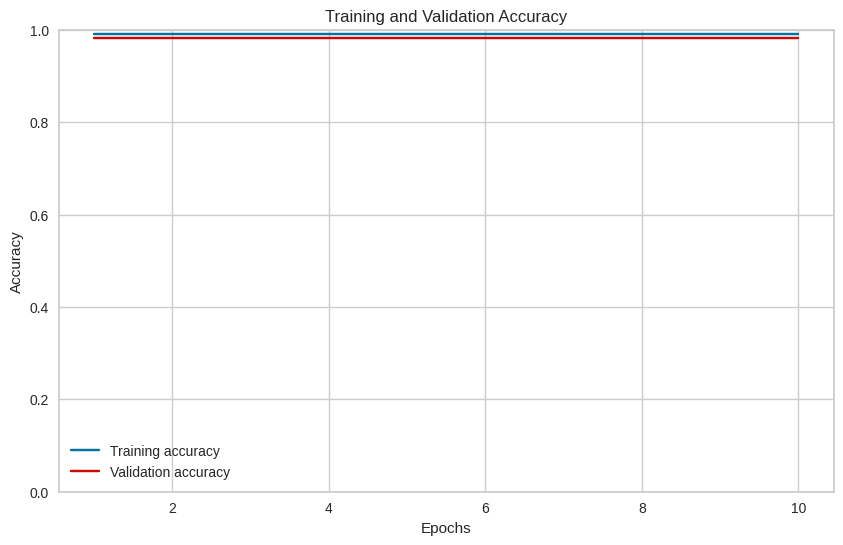

In [76]:
plt.figure(figsize=(10, 6))

epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.ylim(0, 1)  # Setting the y-axis limits between 0 and 1 for accuracy values
plt.show()

In [62]:
model_pipe.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

In [63]:
predict_val = model_pipe.predict(X_test)

In [64]:
from sklearn import metrics

In [66]:
metrics.accuracy_score(Y_test, predict_val)*100

98.16247582205028

In [51]:
model_pipe.predict(['ಕನ್ನಡ'])

array(['Kannada'], dtype=object)

In [52]:
model_pipe.predict(['русский язык'])

array(['Russian'], dtype=object)

In [29]:
model_pipe.predict(['தமிழ் :::'])

array(['Tamil'], dtype=object)

In [30]:
model_pipe.predict(['Deutsch'])

array(['German'], dtype=object)

In [31]:
model_pipe.predict(['Hello, How Are you (Hamza)'])

array(['English'], dtype=object)